In [52]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as ex
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

In [18]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import StandardScaler,LabelEncoder
enc=LabelEncoder()

In [3]:
df=pd.read_csv('stroke-prediction.csv')

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (5110, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
"""1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

"""

In [9]:
df = df.drop('id', axis=1) #drop id column

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


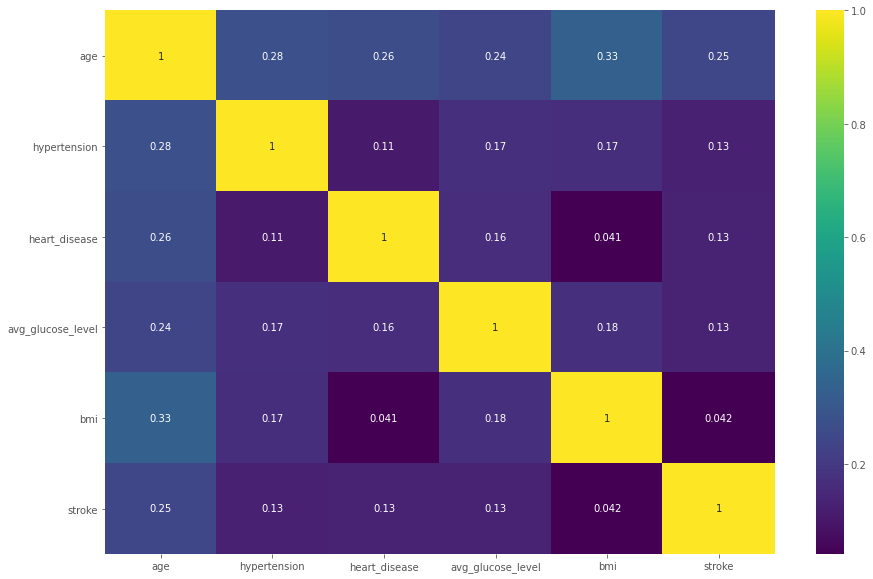

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')
plt.show()

In [10]:
px.parallel_coordinates(df,color='stroke')

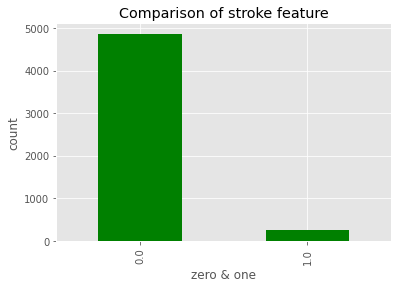

In [39]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'green')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()


In [ ]:
#Imbalance Dataset

In [ ]:
#Data Preprocessing
#HANDLING MISSING VALUES

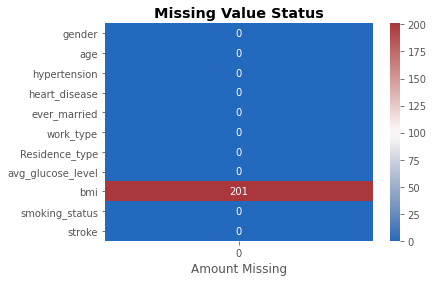

In [14]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [33]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
#Encode target labels with value between 0 and n_classes-1.

In [26]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [27]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.879487,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [36]:
# Split Dataset for training and testing

In [37]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4088, 10)
Number transactions y_train dataset:  (4088,)
Number transactions X_test dataset:  (1022, 10)
Number transactions y_test dataset:  (1022,)


In [45]:
#Model Selection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Handle Imbalanced Data through SMOTE technique

In [50]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 10)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


In [56]:
models_balanced = []
models_balanced.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models_balanced.append(['SVM', SVC(random_state=0)])
models_balanced.append(['KNeighbors', KNeighborsClassifier()])
models_balanced.append(['GaussianNB', GaussianNB()])
models_balanced.append(['BernoulliNB', BernoulliNB()])
models_balanced.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models_balanced.append(['Random Forest', RandomForestClassifier(random_state=0)])
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
   
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('-----------------------------------')
    print('')
    
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_1.append(lst_2)

Logistic Regreesion :
[[761 207]
 [ 18  36]]
Accuracy Score:  0.7798434442270059

K-Fold Validation Mean Accuracy: 77.81 %

Standard Deviation: 2.01 %

ROC AUC Score: 0.73

Precision: 0.15
-----------------------------------

SVM :
[[696 272]
 [ 13  41]]
Accuracy Score:  0.7211350293542075

K-Fold Validation Mean Accuracy: 78.63 %

Standard Deviation: 1.55 %

ROC AUC Score: 0.74

Precision: 0.13
-----------------------------------

KNeighbors :
[[811 157]
 [ 28  26]]
Accuracy Score:  0.8189823874755382

K-Fold Validation Mean Accuracy: 89.15 %

Standard Deviation: 1.23 %

ROC AUC Score: 0.66

Precision: 0.14
-----------------------------------

GaussianNB :
[[731 237]
 [ 15  39]]
Accuracy Score:  0.7534246575342466

K-Fold Validation Mean Accuracy: 78.90 %

Standard Deviation: 1.75 %

ROC AUC Score: 0.74

Precision: 0.14
-----------------------------------

BernoulliNB :
[[818 150]
 [ 31  23]]
Accuracy Score:  0.8228962818003914

K-Fold Validation Mean Accuracy: 80.85 %

Standard Devia

In [57]:
Model_accuracy = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision'])

In [58]:
Model_accuracy.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [59]:
Model_accuracy

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision
6,Random Forest,94.324853,97.162683,6.808212,0.497934,0.000000
5,Decision Tree,90.117417,94.683465,4.755434,0.536922,0.114754
4,BernoulliNB,82.289628,80.850804,3.676676,0.635484,0.132948
2,KNeighbors,81.898239,89.146869,1.234271,0.659646,0.142077
0,Logistic Regreesion,77.984344,77.805967,2.009245,0.726412,0.148148
3,GaussianNB,75.342466,78.898001,1.754248,0.738694,0.141304
1,SVM,72.113503,78.628177,1.545512,0.739134,0.130990


In [60]:
#We can see that Random Forest and Decision Tree Classifier have better accuracy over others.

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
tuning_grid=[
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[50,100,150,200,300],'criterion':['gini','entropy'],'random_state':[0,1,2]}])]

In [64]:
for i,j in tuning_grid:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

DecisionTreeClassifier():
Best Accuracy : 94.68%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 97.24%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 1}

----------------



In [66]:
#After tuning hyperparameters of these models, we have found best parameters that are best fit for each model.

In [77]:
classifier = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       968
         1.0       0.11      0.13      0.12        54

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.91      0.90      0.90      1022

ROC AUC score: 0.5369222528313438
Accuracy Score:  0.901174168297456


In [81]:
classifier2 = RandomForestClassifier(criterion='gini',n_estimators= 300,random_state=2)
classifier2.fit(X_train_res, y_train_res)
y_pred2 = classifier2.predict(X_test)
y_prob2 = classifier2.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred2)

print(classification_report(y_test, y_pred2))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob2)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.33      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.64      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022

ROC AUC score: 0.756217477808387
Accuracy Score:  0.9452054794520548
